In [1]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE,SpectralEmbedding,LocallyLinearEmbedding,MDS
from sklearn.decomposition import PCA
import umap
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('../csv/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [3]:
# ids_with_target_error = [328,443,513,2619,3640,3900,4342,5781,6552,6554,6570,6701,6702,6729,6861,7226]
# train.loc[train['id'].isin(ids_with_target_error),'target'] = 0

In [4]:
len_elmo = 1024
len_bert = 768
len_w2v = 300
len_glove = 200

In [5]:
elmo_train = np.loadtxt("../train_embedding_file_elmo.txt").reshape(len(train.index),len_elmo)
w2v_train = np.loadtxt("../train_embedding_file_w2v(norm).txt").reshape(len(train.index),len_w2v)
glove_train = np.loadtxt("../train_embedding_file_glove.txt").reshape(len(train.index),len_glove)
bert_train = np.loadtxt("../train_embedding_file_bert.txt").reshape(len(train.index),len_bert)

In [6]:
elmo_train_lemm = np.loadtxt("../train_embedding_file_elmo_lemm.txt").reshape(len(train.index),len_elmo)
w2v_train_lemm = np.loadtxt("../train_embedding_file_w2v(norm)_lemm.txt").reshape(len(train.index),len_w2v)
glove_train_lemm = np.loadtxt("../train_embedding_file_glove_lemm.txt").reshape(len(train.index),len_glove)
bert_train_lemm = np.loadtxt("../train_embedding_file_bert_lemm.txt").reshape(len(train.index),len_bert)

In [26]:
scaled_elmo = StandardScaler().fit_transform(elmo_train)
scaled_w2v = StandardScaler().fit_transform(w2v_train)
scaled_bert = StandardScaler().fit_transform(bert_train)
scaled_glove = StandardScaler().fit_transform(glove_train)
scaled_elmo_lemm = StandardScaler().fit_transform(elmo_train_lemm)
scaled_w2v_lemm = StandardScaler().fit_transform(w2v_train_lemm)
scaled_bert_lemm = StandardScaler().fit_transform(bert_train_lemm)
scaled_glove_lemm = StandardScaler().fit_transform(glove_train_lemm)

# UMAP

In [22]:
reducer = umap.UMAP(n_components=2, metric='euclidean')

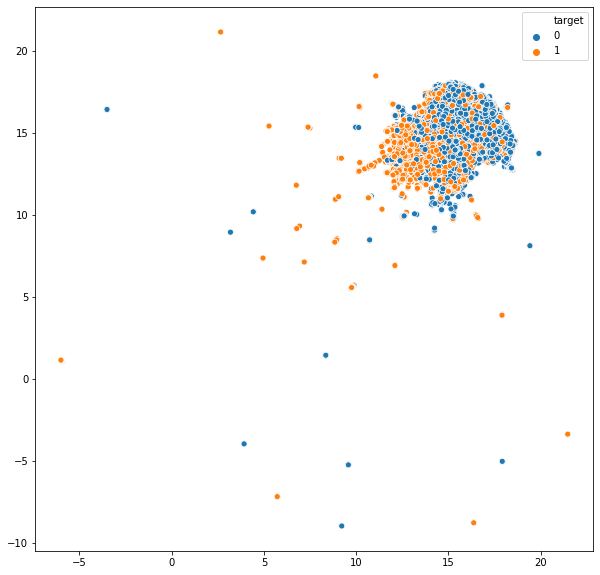

In [12]:
elmo_umap = reducer.fit_transform(scaled_elmo)
plt.figure(figsize=(10,10))
sns.scatterplot(elmo_umap[:,0],elmo_umap[:,1],hue=train['target'])

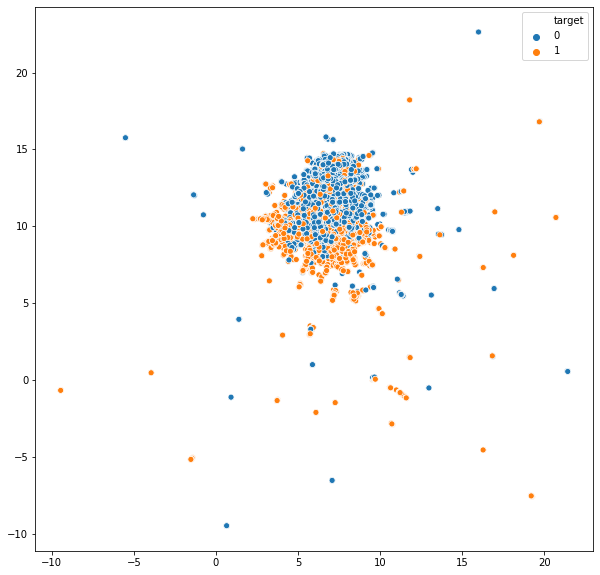

In [23]:
w2v_umap = reducer.fit_transform(scaled_w2v)
plt.figure(figsize=(10,10))
sns.scatterplot(w2v_umap[:,0],w2v_umap[:,1],hue=train['target'])

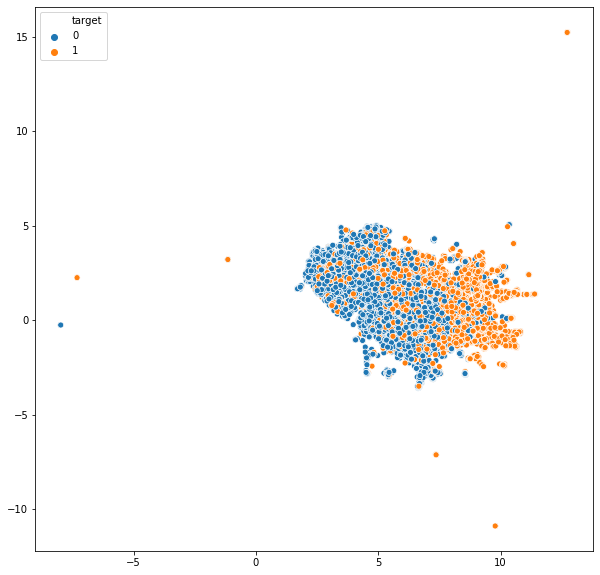

In [24]:
bert_umap = reducer.fit_transform(scaled_bert)
plt.figure(figsize=(10,10))
sns.scatterplot(bert_umap[:,0],bert_umap[:,1],hue=train['target'])

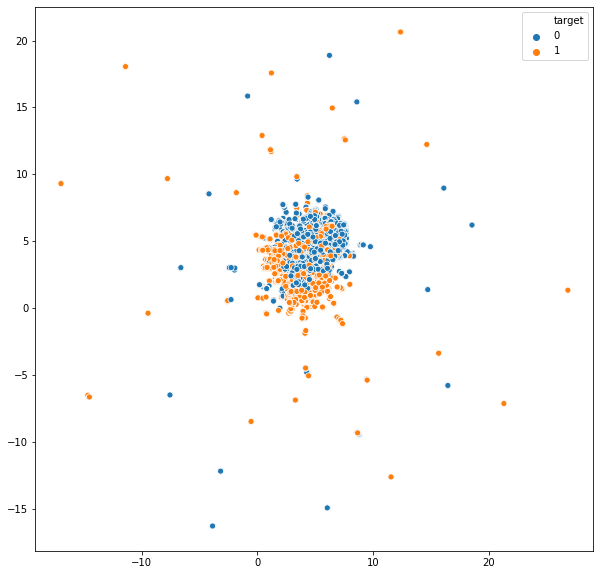

In [27]:
glove_umap = reducer.fit_transform(scaled_glove)
plt.figure(figsize=(10,10))
sns.scatterplot(glove_umap[:,0],glove_umap[:,1],hue=train['target'])

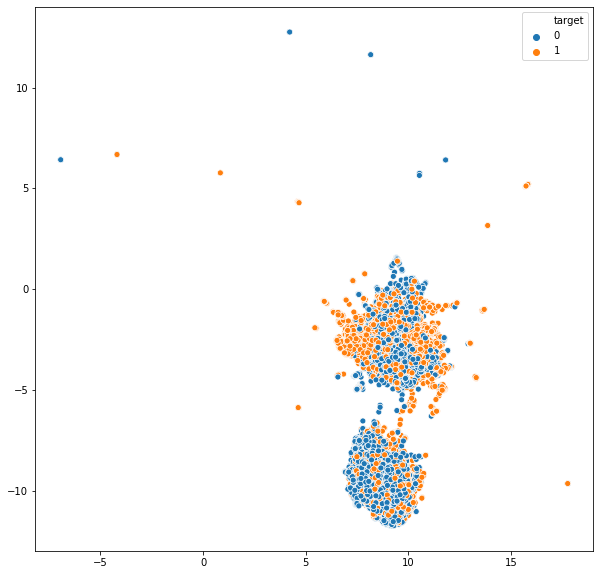

In [28]:
elmo_lemm_umap = reducer.fit_transform(scaled_elmo_lemm)
plt.figure(figsize=(10,10))
sns.scatterplot(elmo_lemm_umap[:,0],elmo_lemm_umap[:,1],hue=train['target'])

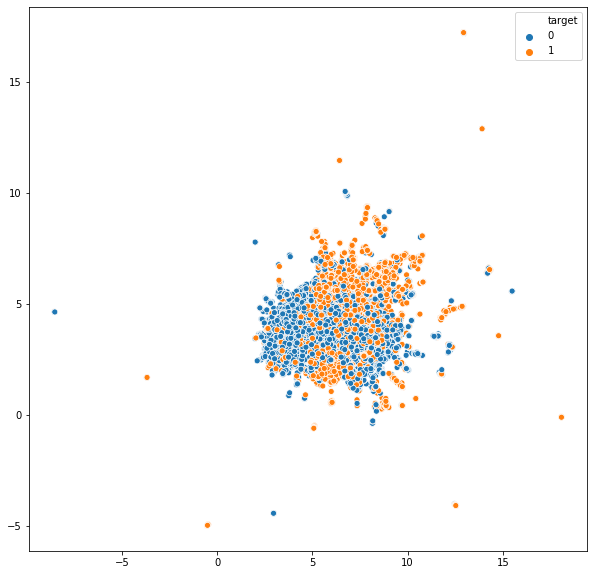

In [29]:
w2v_lemm_umap = reducer.fit_transform(scaled_w2v_lemm)
plt.figure(figsize=(10,10))
sns.scatterplot(w2v_lemm_umap[:,0],w2v_lemm_umap[:,1],hue=train['target'])

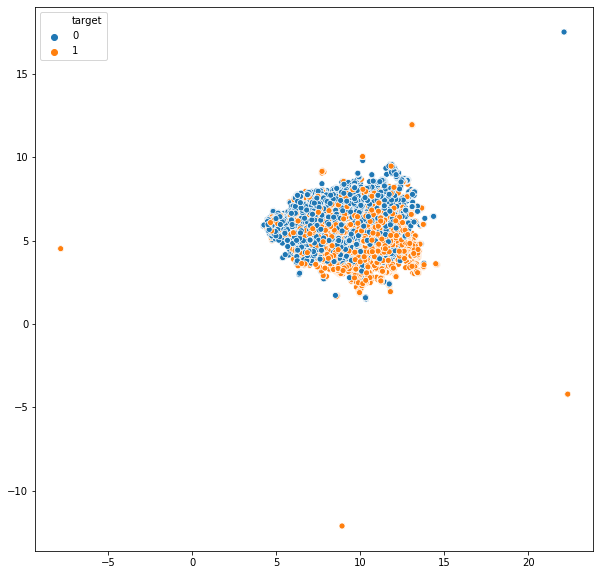

In [30]:
bert_lemm_umap = reducer.fit_transform(scaled_bert_lemm)
plt.figure(figsize=(10,10))
sns.scatterplot(bert_lemm_umap[:,0],bert_lemm_umap[:,1],hue=train['target'])

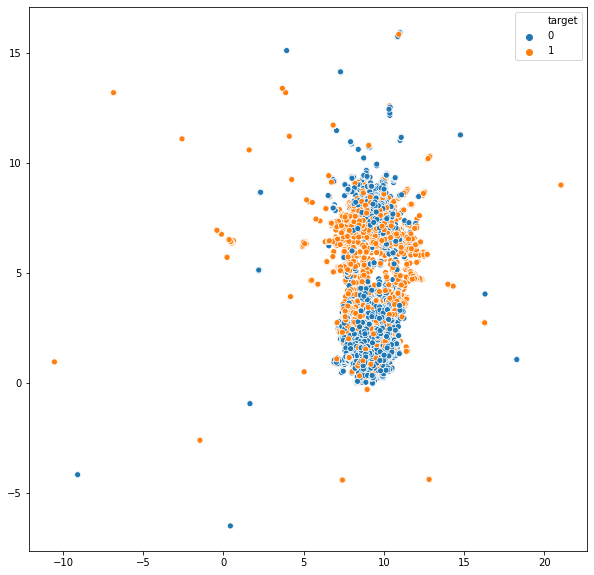

In [31]:
glove_lemm_umap = reducer.fit_transform(scaled_glove_lemm)
plt.figure(figsize=(10,10))
sns.scatterplot(glove_lemm_umap[:,0],glove_lemm_umap[:,1],hue=train['target'])

# PCA

In [32]:
pca = PCA(n_components=2)

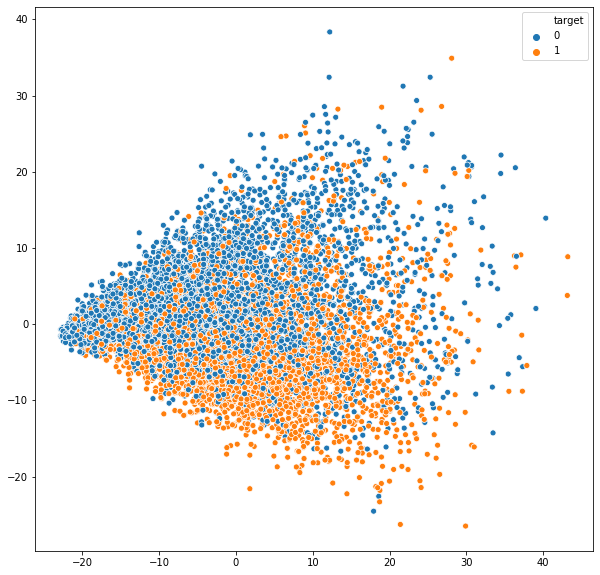

In [33]:
pca_elmo = pca.fit_transform(scaled_elmo)
plt.figure(figsize=(10,10))
sns.scatterplot(pca_elmo[:,0],pca_elmo[:,1],hue=train['target'])

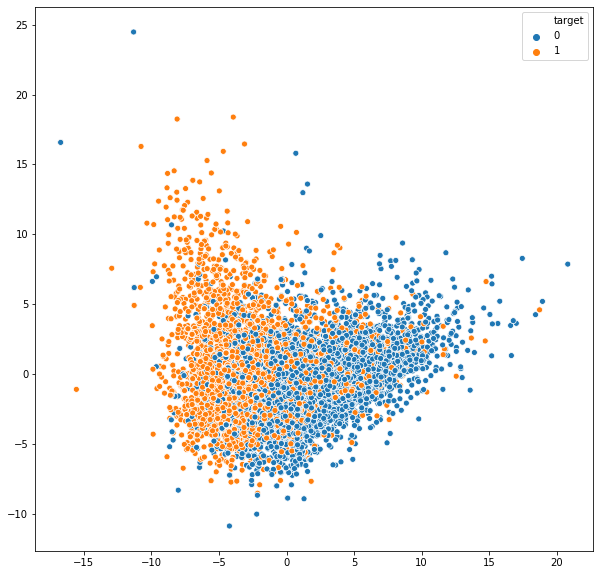

In [34]:
pca_w2v = pca.fit_transform(scaled_w2v)
plt.figure(figsize=(10,10))
sns.scatterplot(pca_w2v[:,0],pca_w2v[:,1],hue=train['target'])

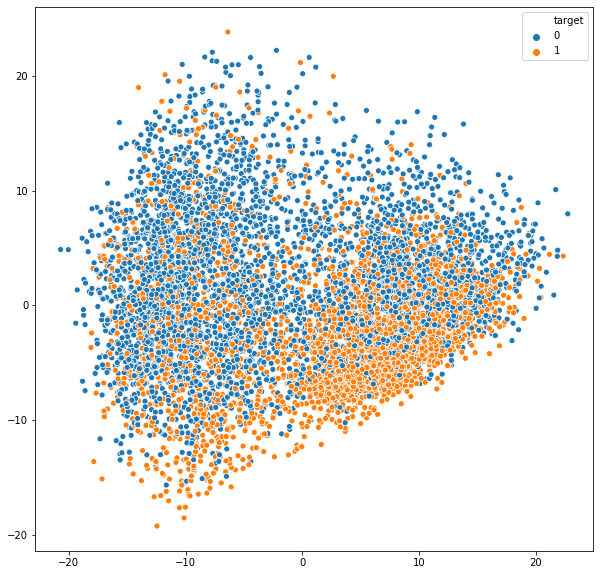

In [35]:
pca_bert = pca.fit_transform(scaled_bert)
plt.figure(figsize=(10,10))
sns.scatterplot(pca_bert[:,0],pca_bert[:,1],hue=train['target'])

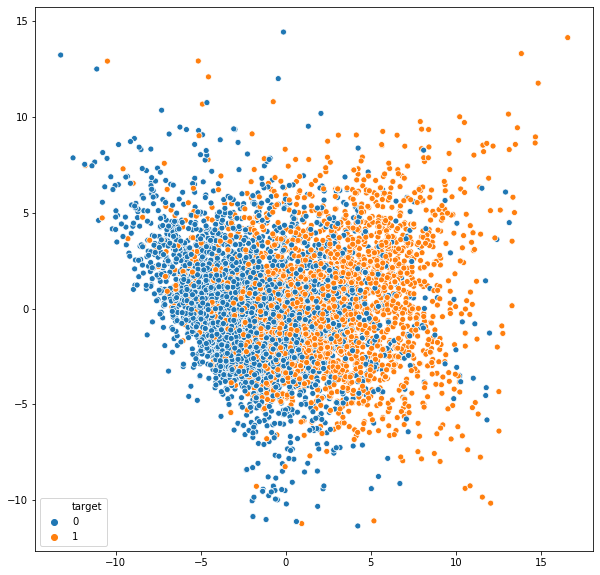

In [36]:
pca_glove = pca.fit_transform(scaled_glove)
plt.figure(figsize=(10,10))
sns.scatterplot(pca_glove[:,0],pca_glove[:,1],hue=train['target'])

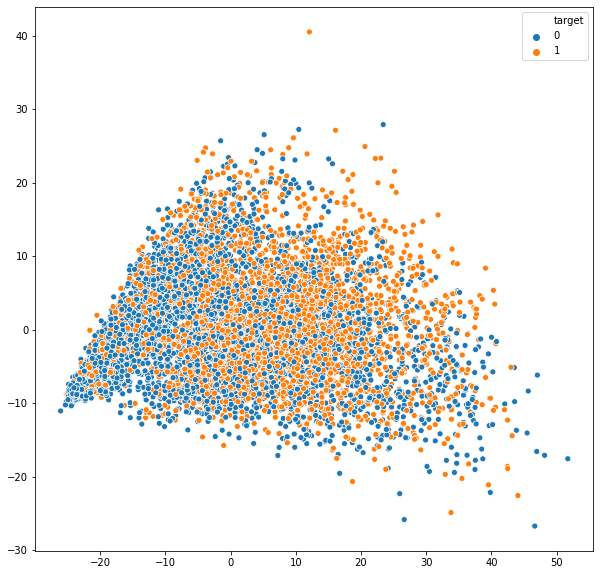

In [37]:
pca_elmo_lemm = pca.fit_transform(scaled_elmo_lemm)
plt.figure(figsize=(10,10))
sns.scatterplot(pca_elmo_lemm[:,0],pca_elmo_lemm[:,1],hue=train['target'])

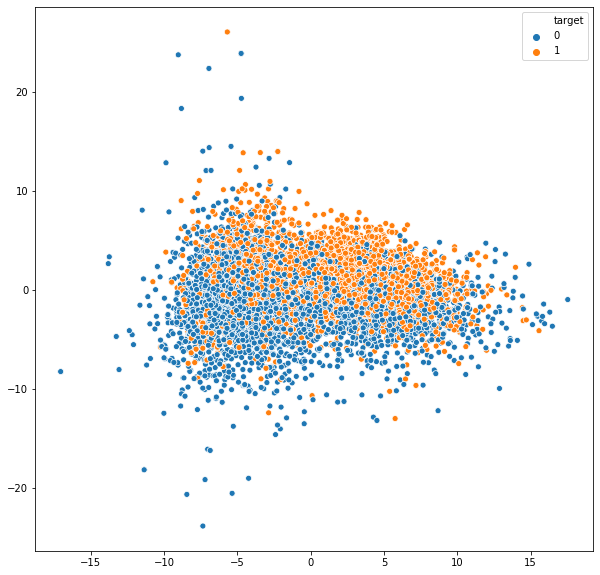

In [38]:
pca_w2v_lemm = pca.fit_transform(scaled_w2v_lemm)
plt.figure(figsize=(10,10))
sns.scatterplot(pca_w2v_lemm[:,0],pca_w2v_lemm[:,1],hue=train['target'])

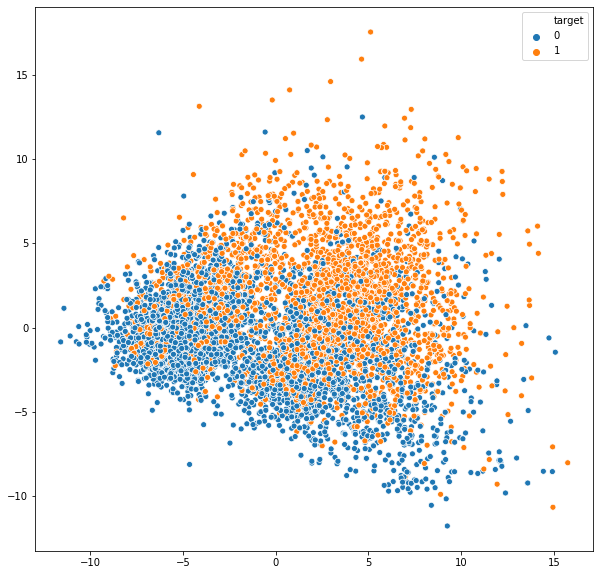

In [39]:
pca_glove_lemm = pca.fit_transform(scaled_glove_lemm)
plt.figure(figsize=(10,10))
sns.scatterplot(pca_glove_lemm[:,0],pca_glove_lemm[:,1],hue=train['target'])

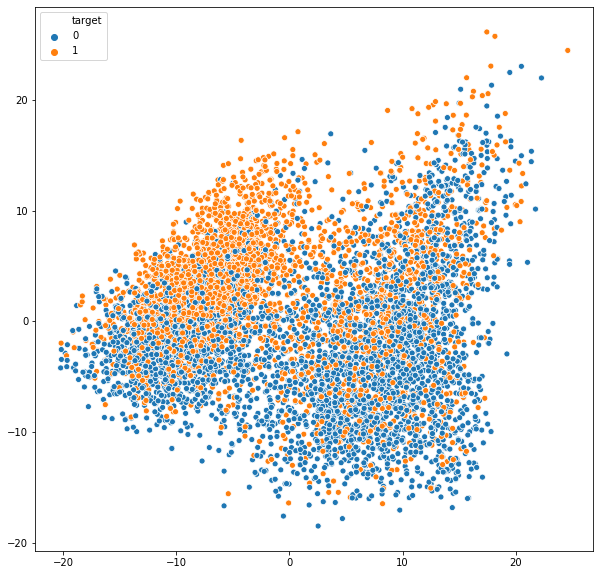

In [40]:
pca_bert_lemm = pca.fit_transform(scaled_bert_lemm)
plt.figure(figsize=(10,10))
sns.scatterplot(pca_bert_lemm[:,0],pca_bert_lemm[:,1],hue=train['target'])

La reducción de dimensiones con los embeddings lematizados no es buena. Ahora, se procede a juntar los embbedings sin lematizar para observar el comportamiento.

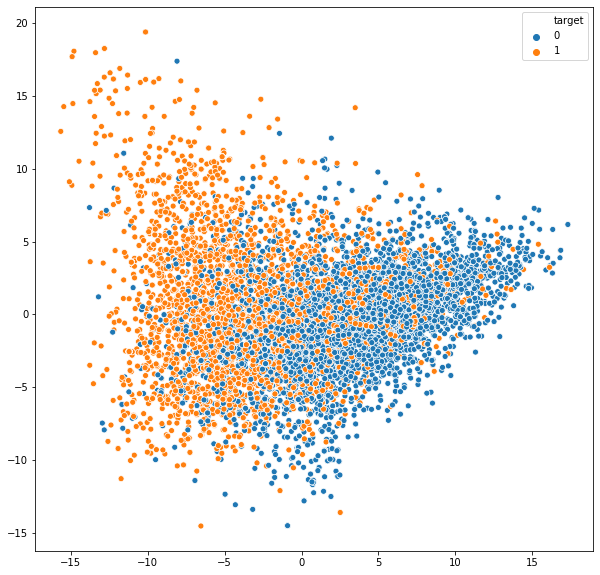

In [41]:
w2v_glove = np.concatenate([w2v_train,glove_train], axis=1)
scaled_w2v_glove = StandardScaler().fit_transform(w2v_glove)
pca_w2v_glove = pca.fit_transform(scaled_w2v_glove)
plt.figure(figsize=(10,10))
sns.scatterplot(pca_w2v_glove[:,0],pca_w2v_glove[:,1],hue=train['target'])

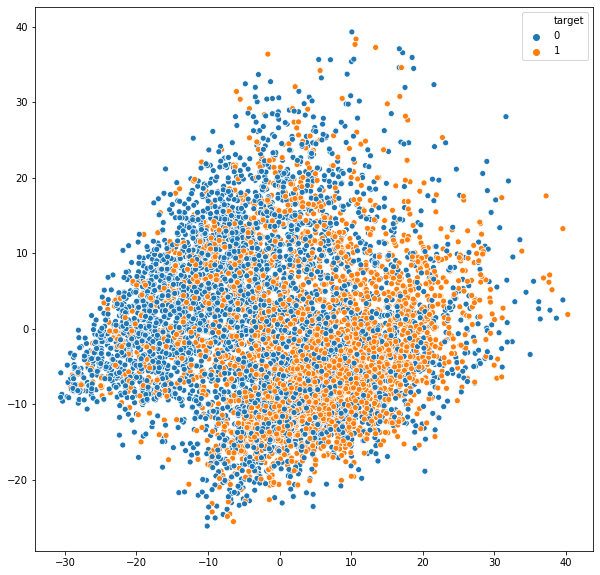

In [42]:
elmo_bert = np.concatenate([elmo_train,bert_train], axis=1)
scaled_elmo_bert = StandardScaler().fit_transform(elmo_bert)
pca_elmo_bert = pca.fit_transform(scaled_elmo_bert)
plt.figure(figsize=(10,10))
sns.scatterplot(pca_elmo_bert[:,0],pca_elmo_bert[:,1],hue=train['target'])

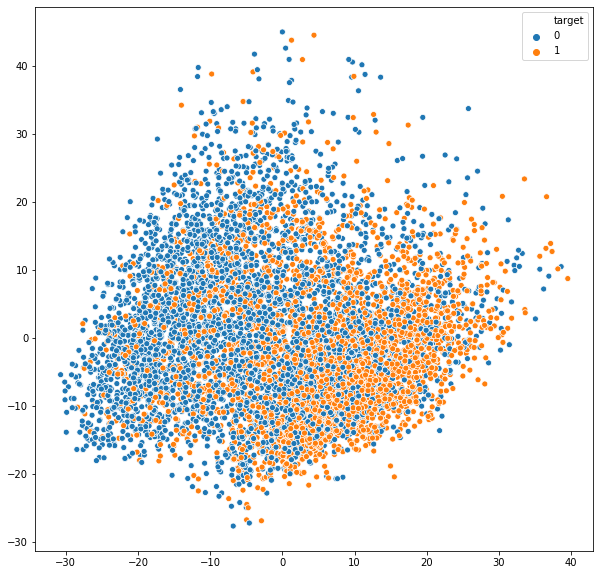

In [43]:
all = np.concatenate([w2v_train,glove_train,elmo_train,bert_train], axis=1)
scaled_all = StandardScaler().fit_transform(all)
pca_all = pca.fit_transform(scaled_all)
plt.figure(figsize=(10,10))
sns.scatterplot(pca_all[:,0],pca_all[:,1],hue=train['target'])

# Reducción de dimensiones al mejor set de datos hasta el momento

In [44]:
best_df_train = pd.read_csv('../csv/results_trees_nets_tf_keyw_train.csv')
scaled_best_df_train = StandardScaler().fit_transform(best_df_train.iloc[:,[5,6,7,8,12]]) #dejo de lado los trees

In [45]:
best_df_test = pd.read_csv('../csv/results_trees_nets_tf_keyw_test.csv')
scaled_best_df_test = StandardScaler().fit_transform(best_df_test.iloc[:,[5,6,7,8,12]])

In [46]:
np.random.seed(2)

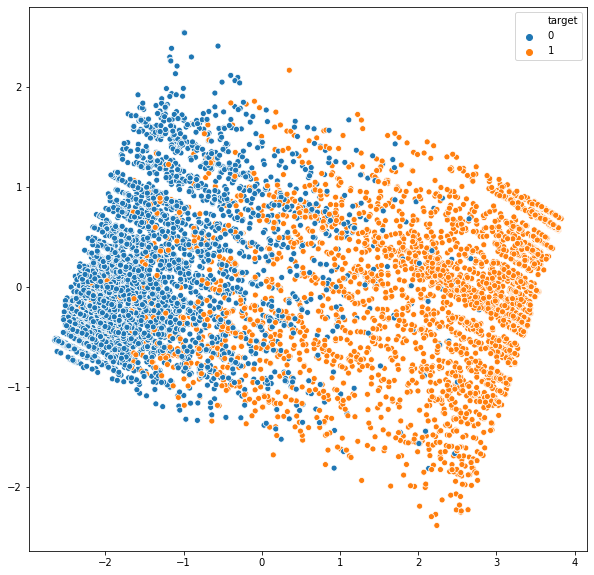

In [47]:
pca = PCA(n_components=2, random_state=5)
pca_best_df_train = pca.fit_transform(scaled_best_df_train)
plt.figure(figsize=(10,10))
sns.scatterplot(pca_best_df_train[:,0],pca_best_df_train[:,1],hue=train['target'])

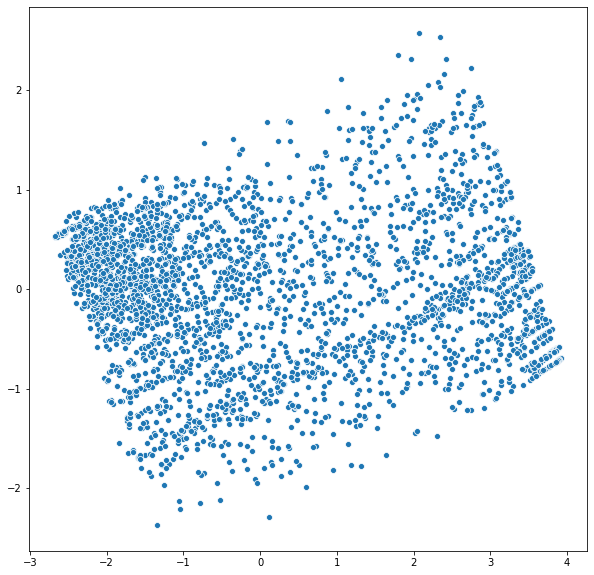

In [49]:
pca_best_df_test = pca.fit_transform(scaled_best_df_test)
plt.figure(figsize=(10,10))
sns.scatterplot(pca_best_df_test[:,0],pca_best_df_test[:,1])

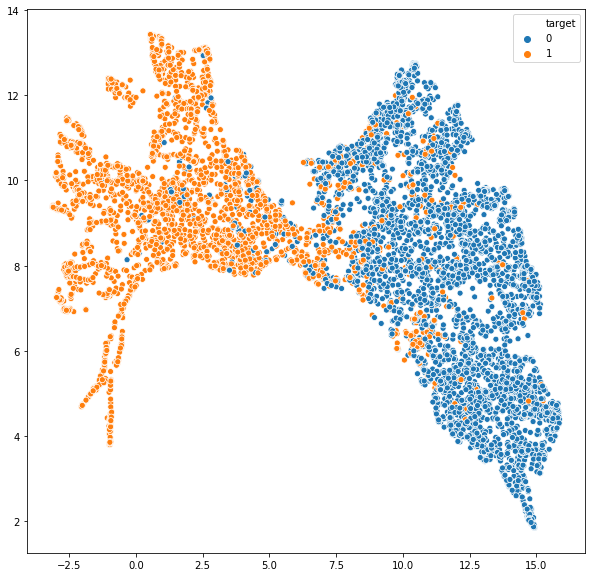

In [50]:
reducer = umap.UMAP(n_neighbors = 20)
best_df_train_umap = reducer.fit_transform(scaled_best_df_train)
plt.figure(figsize=(10,10))
sns.scatterplot(best_df_train_umap[:,0],best_df_train_umap[:,1],hue=train['target'])

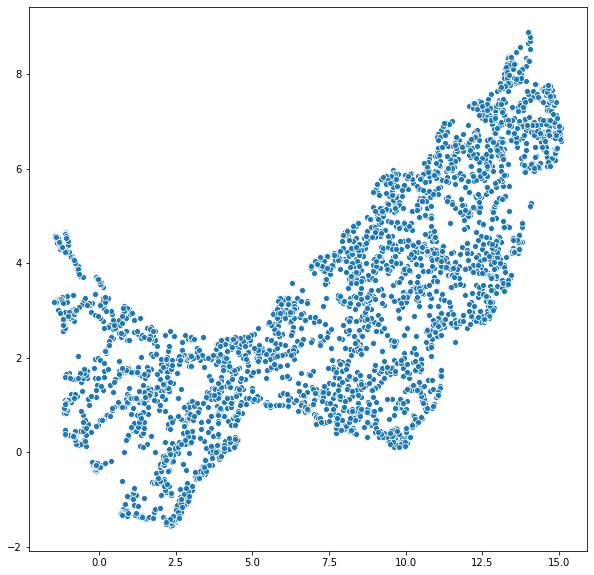

In [52]:
best_df_test_umap = reducer.fit_transform(scaled_best_df_test)
plt.figure(figsize=(10,10))
sns.scatterplot(best_df_test_umap[:,0],best_df_test_umap[:,1])

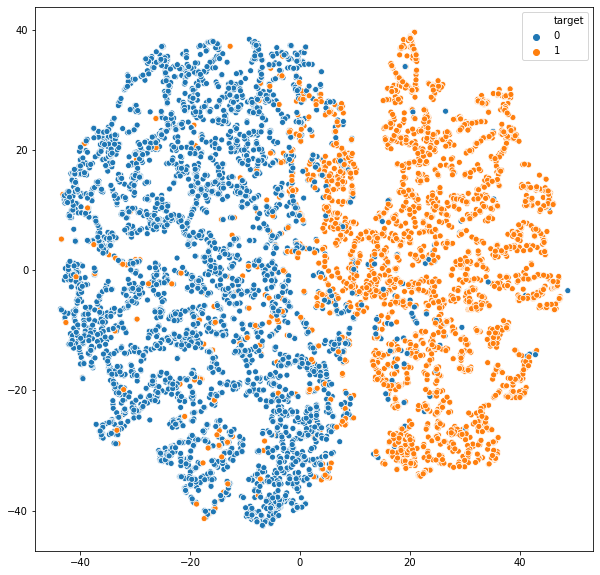

In [54]:
tsne = TSNE(random_state=1342,n_iter=500,metric='cosine',n_components=2)
tsne_best_df_train = tsne.fit_transform(scaled_best_df_train)
plt.figure(figsize=(10,10))
sns.scatterplot(tsne_best_df_train[:,0],tsne_best_df_train[:,1],hue=train['target'])

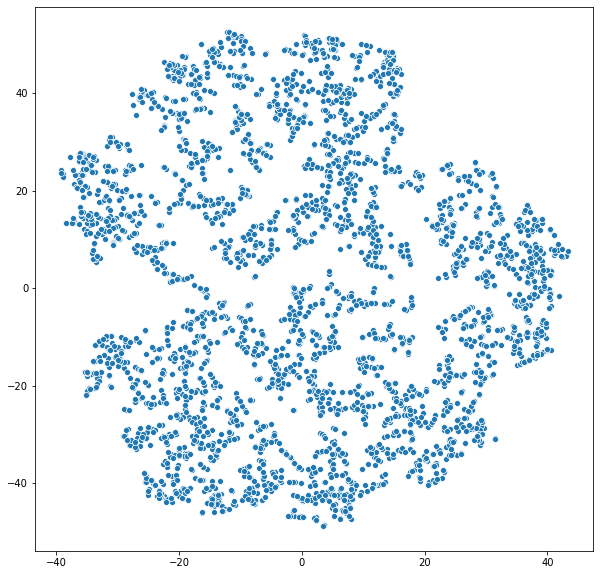

In [55]:
tsne_best_df_test = tsne.fit_transform(scaled_best_df_test)
plt.figure(figsize=(10,10))
sns.scatterplot(tsne_best_df_test[:,0],tsne_best_df_test[:,1])

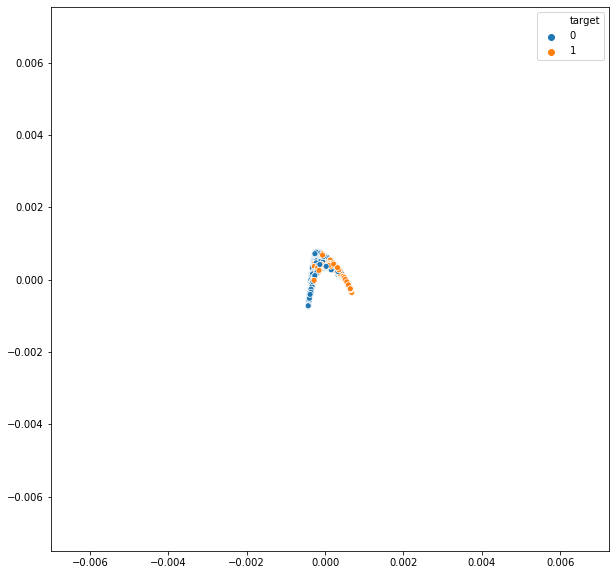

In [56]:
laplacian = SpectralEmbedding(n_components=2, random_state=318)
laplacian_best_df_train = laplacian.fit_transform(scaled_best_df_train)
plt.figure(figsize=(10,10))
sns.scatterplot(laplacian_best_df_train[:,0],laplacian_best_df_train[:,1],hue=train['target'])

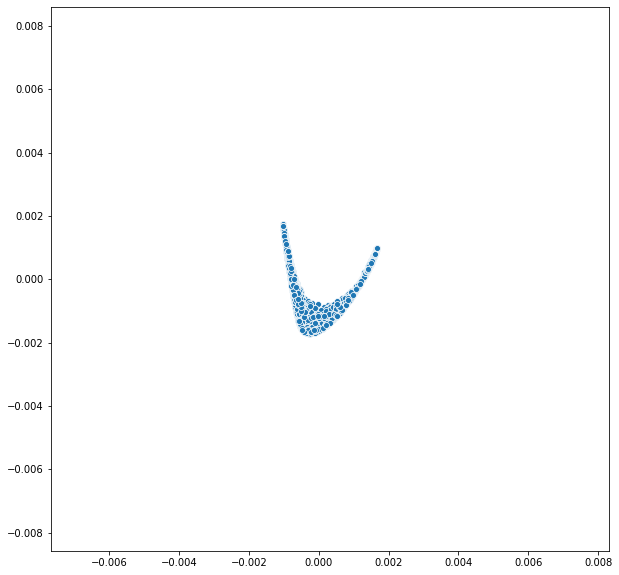

In [57]:
laplacian_best_df_test = laplacian.fit_transform(scaled_best_df_test)
plt.figure(figsize=(10,10))
sns.scatterplot(laplacian_best_df_test[:,0],laplacian_best_df_test[:,1])

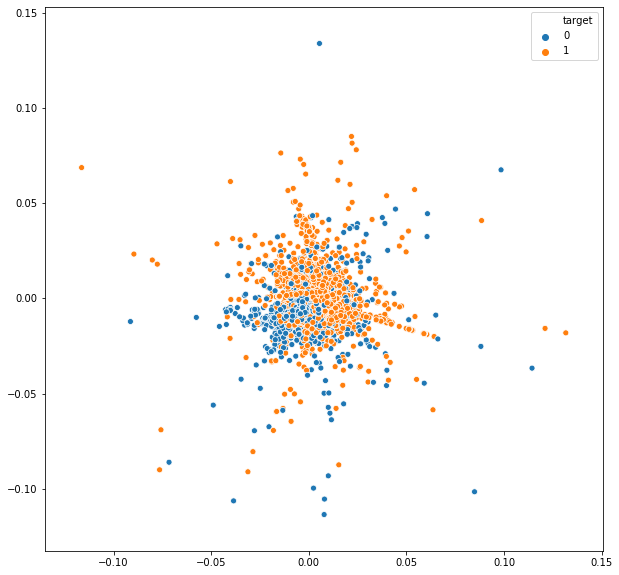

In [58]:
lle = LocallyLinearEmbedding(n_components=2)
lle_best_df_train = lle.fit_transform(scaled_best_df_train)
plt.figure(figsize=(10,10))
sns.scatterplot(lle_best_df_train[:,0],lle_best_df_train[:,1],hue=train['target'])

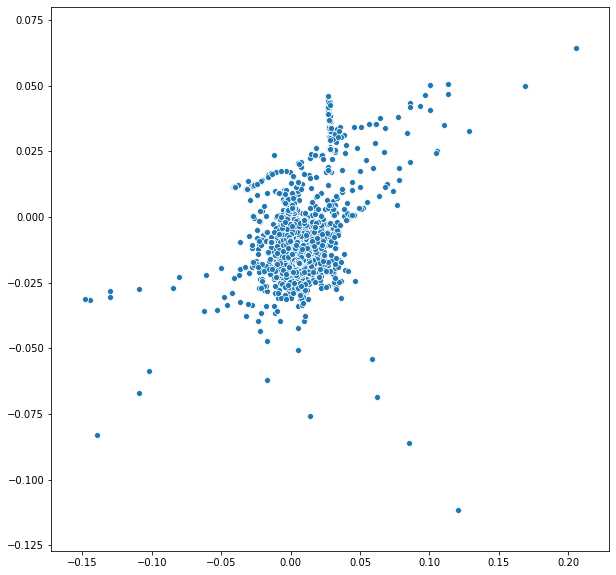

In [59]:
lle_best_df_test = lle.fit_transform(scaled_best_df_test)
plt.figure(figsize=(10,10))
sns.scatterplot(lle_best_df_test[:,0],lle_best_df_test[:,1])

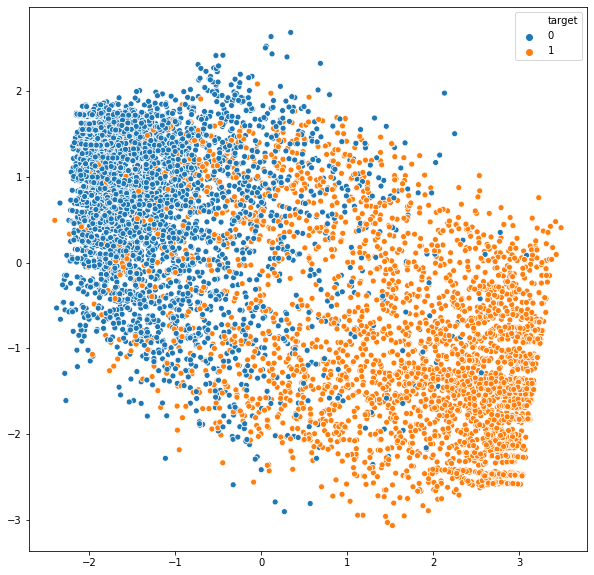

In [60]:
mds = MDS(n_components=2)
mds_best_df_train = mds.fit_transform(scaled_best_df_train)
plt.figure(figsize=(10,10))
sns.scatterplot(mds_best_df_train[:,0],mds_best_df_train[:,1],hue=train['target'])

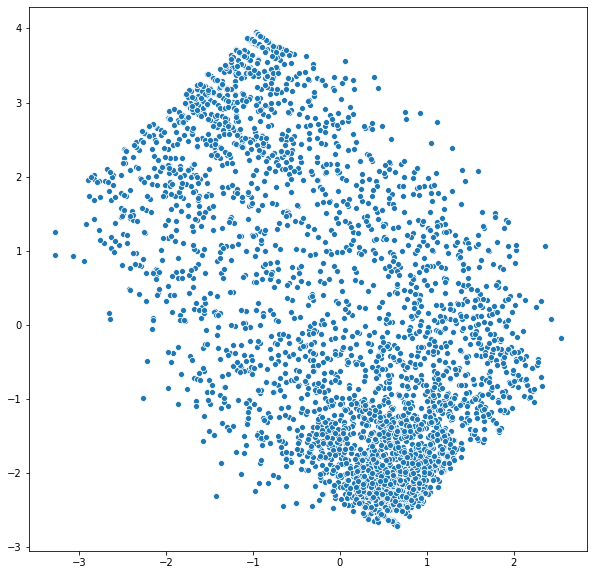

In [61]:
mds_best_df_test = mds.fit_transform(scaled_best_df_test)
plt.figure(figsize=(10,10))
sns.scatterplot(mds_best_df_test[:,0],mds_best_df_test[:,1])